In [7]:
# import standard packages here
# non standard packages are imported closer to the code/functions that use them
import warnings
warnings.filterwarnings("ignore")

# import data manipulation/visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# for model building and results
import tensorflow as tf

# fix a random seed for reproducibility
from numpy.random import seed
seed(123)
from tensorflow import set_random_seed
set_random_seed(234)
RANDOM_SEED = 42

In [8]:
# set working directory
import os
os.getcwd()

# set other file paths vars
data_path = '..\\data'
model_path = '..\\output\\models'

# Abstract
Convolutional neural network models have far-reaching applications in the field of computer vision, yet they all have a primary goal of object classification. Classifying handwritten digits is a simple example that helps to introduce key concepts of convolutional neural networks. 

The Scikit Learn digits data set, a paired down version of the MNIST data set, is used to develop a fully connected neural network model with one hidden layer for digit classification.

Keras, with Tensorflow as the backend, is used to generate the neural network model. While neural networks have many different hyperparameters, the focus here is on the number of nodes in the hidden layer. Therefore, all other hyperparameters are held constant.

In the end, a framework for building a convolutional neural network model is introduced, and the output of the hidden layer is explored in greater detail. Commentary is provided throughout on key obversations, and the results are generalized to other digit classification exercises.

# Introduction
Digit classification is often regarded as the "hello world" for convolutional neural networks. Oftentimes, convolutional neural networks are very complex models, comprised of multiple hidden layers or different architectures. While neural network models in general are regarded as "black box processes," the goal in using this small and prebuilt digits dataset is to help provide education and awareness into a neural network model.

More specifically, there are four primary goals in this assignment:
1. Understand how the number of nodes impacts model accuracy
2. Understand what is happening in the hidden layer, within the broader context of a neural network architecture
3. Introduce a model-building framework
4. Draw conclusions about digit classification exercises 

Therefore, this assignment can be viewed as an introduction into convolutional neural networks, as a foundation is sought on how these models work.

# Literature Review
The primary source of information for this assignment was the Chollet Deep Learning with Python textbook. However, other sources were consulted to gain a deeper understanding of a fully connected neural network architecture, specifcally a multilayer perceptron (MLP) which has one hidden layer. A brief summary of key findings are shared here, but they are not comprehensive by any means.

Below is a diagram that details the MLP architecture for a problem with two classes/output values (Ujjwalkarn).

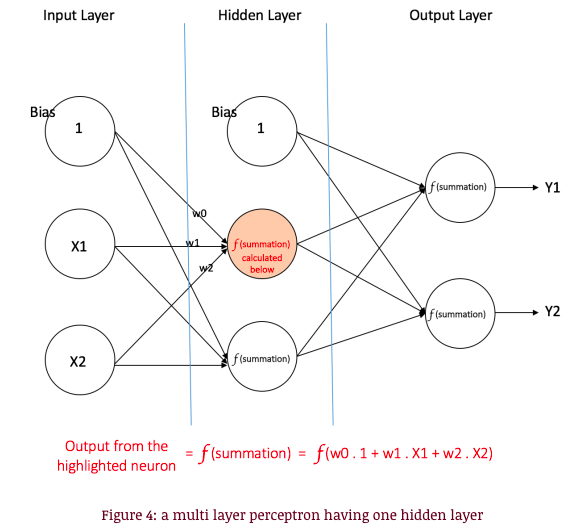

In [27]:
from IPython.display import Image, display
# os.path.dirname goes up one level - different way to do this instead of ..
img1 = Image(os.path.join(os.path.dirname(os.getcwd()),"data","mlp architecture.png"))
display(img1)

From the diagram above, we can better understand the following:

* Fully connected means that each neuron is connected to the neuron in the next layer.
* The weights are integral to the model, as each neuron has a weight associated to it, which is then summed together in the next layer using an activation function.
* Bias nodes are present in the input and hidden layers and are used to help manipulate output to their desired value, or range.

From the diagram below, we can better understand the role of the loss function and optimizer, as this diagram shows at a high level the backpropagation algorithm.

In [13]:
img2 = Image(url = "https://dpzbhybb2pdcj.cloudfront.net/allaire/Figures/03fig01.jpg")
display(img2)

At first pass, a fully connected convoluational neural network model uses input values and weights to obtain an output value that is then transformed (via an activation function) for the subsequent layer. The input values in this context represent each individual pixel within an image. Once the model obtains a set of predictions, it then compares the quality of those predictions against the actual values. 

The weights of the neural network model, including the input-to-hidden weights and hidden-to-output weights, are then adjusted through this backpropagation algorithm, starting with the top most layer. The backpropagation algorithm chains together the derivatives at each node to better understand a given weight's contribution to the total loss value. This information helps to inform how the weights are adjusted, since the broader goal of the model is to reduce the error via the loss function. For greater explanation on this process, please consult the Chollet textbook.

In short, by better understanding model architecture, it is clear that the number of nodes and their weight values play a critical role in model building process. In fact, according to Chollet, the weights contain the network's knowledge (p. 58). Hence, this observation has helped to inform the focus of this assignment.

# Data Preparation
In this section, the digits data is loaded, inspected, and prepared for modeling.

In [28]:
# found this data set here: https://scikit-learn.org/stable/datasets/index.html
# load our data
from sklearn import datasets

# the digits dataset is a small MNIST dataset
digits = datasets.load_digits()

In [29]:
# initially, inspect the data
print(digits.keys())
print(digits.DESCR)

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping 

Based upon the digits documentation and validation steps performed, the digits data is comprised of 8x8 images that 
have pixels ranging from 0 to 16. Additionally, both the documentation and data validation show that there are no missing data values. It is important to validate the shape, range, and missingness of any data set, especially one used for building a neural network model. 

In [30]:
# get the shape of the images and data keys
print(digits.images.shape)
print(digits.data.shape)

(1797, 8, 8)
(1797, 64)


In [31]:
# just to get a feel for the data
print(digits.data[0]) # we notice that the data is not standardized - need to divide by 16 or use standard scaler
print(digits.target[0]) # first image is supposed to be 0
print(digits.target_names[0]) # this seems redudant; won't use

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
0
0


In [32]:
# good to verify - min/max values and missing data, as data set has certain claims about these
# min/max values
print("Max value is: ", max([max(sequence) for sequence in digits.data])) 
print("Min value is: ", min([min(sequence) for sequence in digits.data])) 

# missing data
print("Is there missing data?  Answer:", np.any(np.isnan(digits.data)))

Max value is:  16.0
Min value is:  0.0
Is there missing data?  Answer: False


As a next step, the first ten digit images are shown below. This step is helpful in better understanding what the data actually looks like.

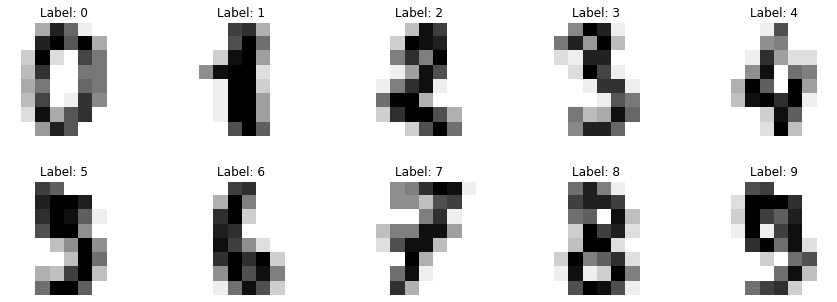

In [33]:
# create a subplot to read in/show the first 10 digits
fig = plt.figure(figsize=(15, 5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

images_and_labels = list(zip(digits.images, digits.target))

for index, (image, label) in enumerate(images_and_labels[:10]):
    plt.subplot(2, 5, index + 1)
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Label: %i' % label)
    plt.axis('off')

The digit images, although fairly blurry, are also distinct. In validating a model, visualizing the images rendered may be a helpful exercise to consider.

Another data inspection step is to better understand how the data is split among each digit class. The plot below shows the row counts for each class.

Text(0.5, 1.0, 'Digits by Label')

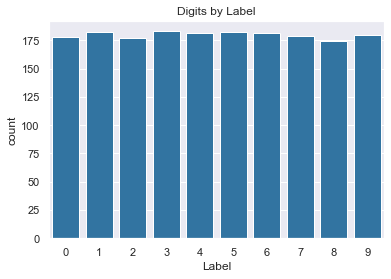

In [34]:
# how many of each class are we dealing with?
labels_df = pd.DataFrame({'Label':digits.target})

current_palette = sns.color_palette() #10 colors
sns.set(style="darkgrid")
sns.countplot(x='Label', data=labels_df, color=current_palette[0]).set_title("Digits by Label") 

The plot above shows that the distribution by digit class is fairly even. Had there been a less even distribution then balancing the classes may have been a data processing step to consider.

Given that data shape, range of values, missingness, and class distribution have been inspected, the data is ready to be prepared for modeling. Here, the data is reshaped so that the pixel data is of shape: (number of rows, 8x8), as this data shape is required when working with a fully connected network. This step enables the data transformations to occur in order to get a one-dimensional output.

In [35]:
# Create feature and target arrays
X = digits.data
y = digits.target

In [36]:
print(X.shape)
y = y.reshape(-1, 1) # added this to fix errors with splitting
print(y.shape)

(1797, 64)
(1797, 1)


In addition, the data is split into training, validation, and testing sets using a 60/20/20 split. In any model building process, separating the data into these three distinct data sets is a best practice for training and tuning hyperparameter values. Of note, in splitting the data into these three subsets, it is important to ensure that the distribution of classes is fairly even. That way, no inherent bias is introduced into a data set and thus a model.

In [37]:
# split into training and test set
# want to make sure we are shuffling before the split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED, shuffle=True, stratify=y)

# we will also split into training and validation sets for model building - we have a 60/20/20 split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=RANDOM_SEED, shuffle=True, stratify=y_train)


In [38]:
# verify the train and test splits
print("X_train shape: ", X_train.shape)
print("X_val shape: ", X_val.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_val shape: ", y_val.shape)
print("y_test shape:", y_test.shape)

X_train shape:  (1077, 64)
X_val shape:  (360, 64)
X_test shape:  (360, 64)
y_train shape:  (1077, 1)
y_val shape:  (360, 1)
y_test shape: (360, 1)


In [39]:
# also verify the split of classes in each set
print("Training set labels dist: ", np.unique(y_train, return_counts=True))
print("Validation set labels dist: ", np.unique(y_val, return_counts=True))
print("Test set labels dist: ",np.unique(y_test, return_counts=True))

# can see that these are very even, which is what we wanted

Training set labels dist:  (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([106, 109, 107, 109, 109, 109, 109, 107, 104, 108], dtype=int64))
Validation set labels dist:  (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([36, 37, 35, 37, 36, 36, 36, 36, 35, 36], dtype=int64))
Test set labels dist:  (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([36, 36, 35, 37, 36, 37, 36, 36, 35, 36], dtype=int64))


As a final data preparation step, the data is standarized so that all pixel values are between [0,1]. This step can be accomplished by simply dividing the data by 16, the maximum pixel value. Having values in this small range is optimal for the neural network model. 

Finally, the class labels are transformed using a one-hot encoding mechanism, which makes this data easier to work with in the model. 

In [40]:
# divide by 16 to scale the data so that all values are between [0,1]
X_train = X_train / 16
X_val = X_val / 16
X_test = X_test / 16

In [41]:
# quick check that we scaled the data properly
print("Max training value is: ", max([max(sequence) for sequence in X_train])) 
print("Min training value is: ", min([min(sequence) for sequence in X_train])) 

print("Max validation value is: ", max([max(sequence) for sequence in X_val])) 
print("Min validaiton value is: ", min([min(sequence) for sequence in X_val])) 

print("Max test value is: ", max([max(sequence) for sequence in X_test])) 
print("Min test value is: ", min([min(sequence) for sequence in X_test])) 

Max training value is:  1.0
Min training value is:  0.0
Max validation value is:  1.0
Min validaiton value is:  0.0
Max test value is:  1.0
Min test value is:  0.0


In [42]:
# one hot encoding transformation
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

Using TensorFlow backend.


# Methods
In this section, several different models will be built using both the training and validation sets. While k-fold cross validatin was considered (see code in Appendix), it was ultimately removed from scope. By building models on the training set and validating them on the validation set, greater speed and simplicity could be achieved in meeting assignment goals.

It is important to note that several functions are used to ensure code reproducibility.

Based on the goals of the assignment, the hyperparameters that will be adjusted are only the number of nodes within the hidden layer. While an initial set of node sizes was proposed, after building several models, the node sizes were adjusted to the following: 1, 2, 5, 8, 16, and 64. Thus, in total seven models will be built for this assignment. It is worth mentioning that the model with a single node in its hidden layer is equivalent to a multinomial logit model.

The below hyperparmeters will be held constant:

* Batch size is 32.
* Epoch size is 500, but will be adjusted before generating predictions for the test set.
* Categorical crossentropy is the loss function used, as this is a natural choice given the nature of the problem (Chollet, p. 84).
* Accuracy is a key metric to measure model performance. In fact, loss and accuracy curves are used to assess/compare model performance and inform the optimal batch size.
* Rmsprop is the optimizer used, with its default learning rate.
* RELU is the activation function used in the hidden layer, as it is a common activation function. Softmax is the activation function in the output layer, because this assignment is dealing with multiclass output.
* For each model, a model summary is provided capturing the number of weights and shape of the output for the hidden and output layers. This summary will come into play when the weights are analyzed in greater detail later on in the assignment.

Protecting against overfitting is essential when working with these types of models. According to Chollet, "the universal tension in machine learning is between optimization and generalization" (p. 114). Therefore, a relatively large batch size of 500 is used as the primary mechanism to determine where a model starts to overfit the training and validation data sets. 

Lastly, Chollet also states that "If your data is divided into many categories, you may cause information bottlenecks if you make the intermediate layers too small" (p. 92). By using a small number of nodes and comparing performance against a relatively larger number of nodes, this statement can be validated. Moreover, creating a small network is another avenue for addressing overfitting in a neural network model.

In [221]:
# set global modeling params
height = 8
width = 8
n_inputs = height * width # 64
n_outputs = 10 # digits 0-9
n_batch_size = 32
num_epochs = 500

#### NOTE ####
# in a perfect world, models would be saved after they are generated and then called later.
# however, b/c we are trying to store everything in git, to save space, we are not saving models.
# so, because of space constraints, models are generated in memory and referenced later in the script.

In [211]:
# accuracy is OK to use here since classes are balanced
# using rmsprop default learning rate
from keras import layers, models, optimizers

def build_model(layer_size):
    model = models.Sequential()
    model.add(layers.Dense(layer_size, activation='relu', input_shape=(n_inputs,))) 
    model.add(layers.Dense(n_outputs, activation='softmax'))
    model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [262]:
# plot the training and validation loss
def loss_plot(history, model_name):
    # define the values for the plot
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1,len(loss)+1)
    # now plot these values
    plt.plot(epochs, loss, color=current_palette[0], label='Training loss')
    plt.plot(epochs, val_loss, color=current_palette[1], label='Validation loss')
    plt.title('Training and validation loss ' + str(model_name))
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    #plt.show()
    
# plot the training and validation accuracy
def acc_plot(history, model_name):
    # define the values for the plot
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    epochs = range(1,len(acc)+1)
    # now plot these values
    plt.plot(epochs, acc, color=current_palette[0], label = 'Training acc')
    plt.plot(epochs, val_acc, color=current_palette[1], label='Validation acc')
    plt.title('Training and validation accuracy ' + str(model_name))
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    #plt.show()    

In [410]:
def model_generation_and_output(nodes, model_name):
    model = build_model(nodes) # builds the model that was defined above
    history = model.fit(X_train, y_train, batch_size=n_batch_size, epochs=num_epochs, validation_data = (X_val, y_val), verbose=0)
    summary = model.summary()
    weights = model.get_weights()
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (15,4))
    plt.figure(1)
    plt.subplot(121)
    loss_plot(history, model_name)
    plt.subplot(122)
    acc_plot(history, model_name)
    plt.show()
    return summary, weights

## Model One - One Node
In analyzing the output from model one, the model with one node, the model summary table shows that the hidden layer evalutes 65 parameters, or weights. In recalling the neural network architecture, there are 64 input nodes (8x8 images) plus 1 bias node connected to one hidden layer node, for a total of 65 weight or parameter values. The hidden layer then connects to the output layer, which has 10 nodes. However, because the hidden layer has 1 bias neuron, this bias neuron is connected to each output node, which thus adds 10 more parameters to the model (for a total of 20). The model summary helps to keep track of the model architecture and is provided for background purposes only.

More importantly, the loss and accuracy curves show that there is both high loss and low accuracy, which means that this model does not perform well. The accuracy barely gets above 35%. There is some mild separation in the training and validation curves from 400 epochs onward, which is where the model starts to overfit. Furthermore, the loss and accuracy curves are not as smooth, which speaks to Chollet's point about "information bottlenecks" (p. 92).

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_311 (Dense)            (None, 1)                 65        
_________________________________________________________________
dense_312 (Dense)            (None, 10)                20        
Total params: 85
Trainable params: 85
Non-trainable params: 0
_________________________________________________________________


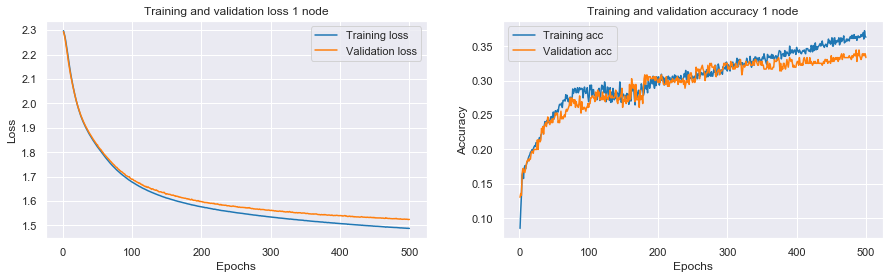

In [412]:
np.random.seed(37)
model1 = model_generation_and_output(1, "1 node")

## Model Two - Two Nodes
From the output of model two, the two-node model, the model summary helps to show that the number of parameters considered in the model has expanded. There are now 65 input nodes connected to two hidden layer nodes, for a total of 130 weights. Within the hidden layer, the two hidden and one bias nodes (three total nodes) are connected to ten output nodes for a total of 30 weights.

More importantly, the loss function is lower and the accuracy is higher than the model with one hidden node. This model starts to overfit after 200 nodes, however, as there is greater separation between the training and validation curves. At 200 epochs, the loss is hovering around 1.0, and the accuracy is about 70%.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_313 (Dense)            (None, 2)                 130       
_________________________________________________________________
dense_314 (Dense)            (None, 10)                30        
Total params: 160
Trainable params: 160
Non-trainable params: 0
_________________________________________________________________


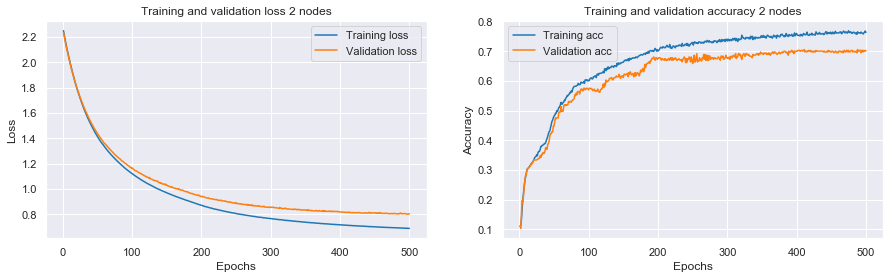

In [421]:
np.random.seed(37)
model2 = model_generation_and_output(2, "2 nodes")

## Model Three - Five Nodes
With model three, the five-node model, model performance is once again improved. With the remaining models (8, 10, 16, and 64 nodes), the performance continues to get better. However, overfitting becomes more of an issue with fewer epochs in these models. By expanding the number of nodes in the hidden layer, the model is able to learn trends more quickly within the data and thus does not impose an "information bottleneck" (Chollet, p. 92). The accuracy curves continue to get smoother and smoother. On the basis of number of nodes alone, it is clear that just with one hidden layer, increasing the number of nodes has a significant impact on model performance. The model with 64-nodes (without overfitting) reaches an accuracy of about 95% and has a loss value of about .20.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_315 (Dense)            (None, 5)                 325       
_________________________________________________________________
dense_316 (Dense)            (None, 10)                60        
Total params: 385
Trainable params: 385
Non-trainable params: 0
_________________________________________________________________


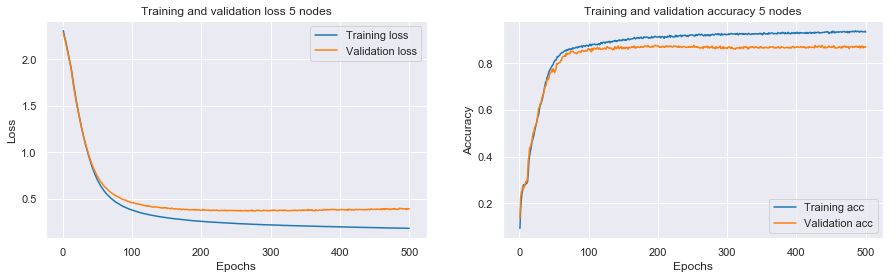

In [422]:
np.random.seed(37)
model3 = model_generation_and_output(5, "5 nodes")

## Model Four - Eight Nodes

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_317 (Dense)            (None, 8)                 520       
_________________________________________________________________
dense_318 (Dense)            (None, 10)                90        
Total params: 610
Trainable params: 610
Non-trainable params: 0
_________________________________________________________________


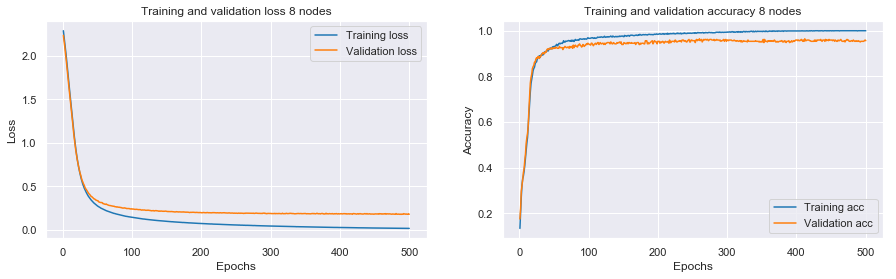

In [423]:
np.random.seed(37)
model4 = model_generation_and_output(8, "8 nodes")

## Model Five - Ten Nodes

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_319 (Dense)            (None, 10)                650       
_________________________________________________________________
dense_320 (Dense)            (None, 10)                110       
Total params: 760
Trainable params: 760
Non-trainable params: 0
_________________________________________________________________


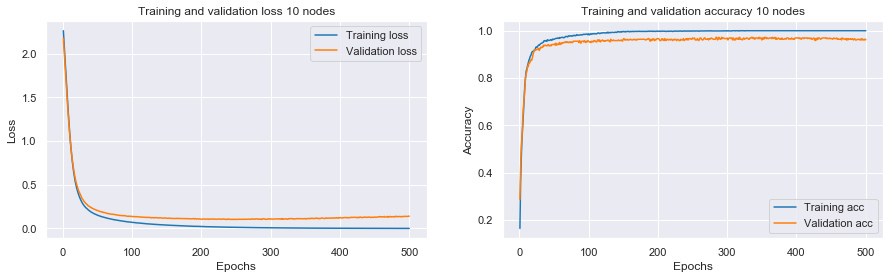

In [424]:
np.random.seed(37)
model5 = model_generation_and_output(10, "10 nodes")

## Model Six - Sixteen Nodes

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_321 (Dense)            (None, 16)                1040      
_________________________________________________________________
dense_322 (Dense)            (None, 10)                170       
Total params: 1,210
Trainable params: 1,210
Non-trainable params: 0
_________________________________________________________________


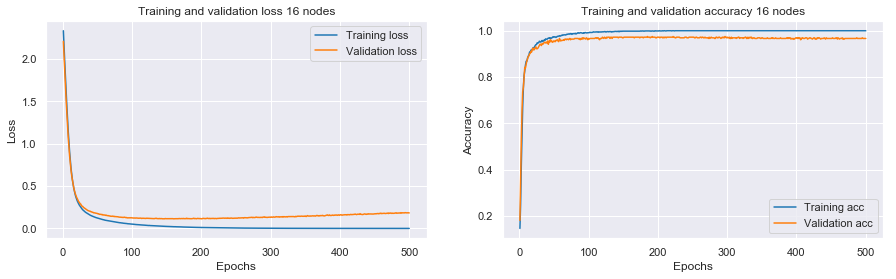

In [425]:
np.random.seed(37)
model6 = model_generation_and_output(16, "16 nodes")

## Model Seven - Sixty-Four Nodes

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_323 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_324 (Dense)            (None, 10)                650       
Total params: 4,810
Trainable params: 4,810
Non-trainable params: 0
_________________________________________________________________


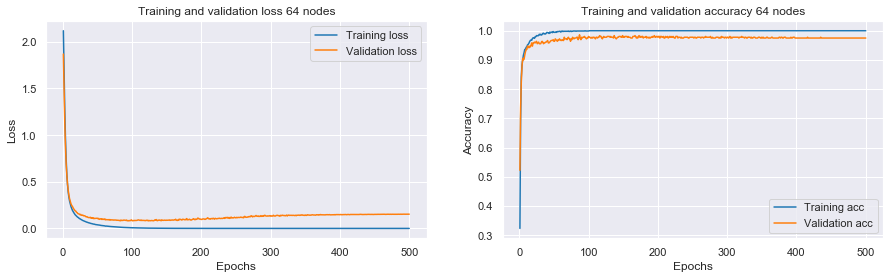

In [426]:
np.random.seed(37)
model7 = model_generation_and_output(64, "64 nodes")

## Weight Exploration

While the output above was helpful for understanding the architecture and performance of each model, the weights of each model will be analyzed in greater detail to provide commentary on what is actually happening behind the scenes. For purposes of simplicity, model two (two nodes) and model seven (64 nodes) are used for comparison, as these two models have the widest separation in terms of performance. Model one is discounted here because relationships among weights of hidden nodes cannot be analyzed. Additionally, model four (8 nodes) is added to help confirm trends that are observed.

Only the hidden to output weights will be considered because these weights can be standardized and compared across models. Also, the hidden to output weights are transposed so that correlations can be calculated using the values of the weights. Otherwise, in their raw form, the correlations would be just of the nodes themselves and not provide any meaningful information.

The correlation matrices of the hidden to output weights for the three models are shown below.

In [585]:
# extract the weights and assign them values for each of use
# in examining the weight values, the bias values are also included. we don't need those
model2_inputhidden = model2[1][0]
model2_hiddenoutput = model2[1][2]
model4_inputhidden = model4[1][0]
model4_hiddenoutput = model4[1][2]
model7_inputhidden = model7[1][0]
model7_hiddenoutput = model7[1][2]

In [586]:
# remember, bias is excluded so shape doesn't exactly match model summaries
print(np.shape(model2_inputhidden)) # 64 neurons connected to one neuron
print(np.shape(model2_hiddenoutput)) # one neuron connected to 10 output neurons
print(np.shape(model4_inputhidden)) # 64 neurons connected to 8 neurons
print(np.shape(model4_hiddenoutput)) # 8 neurons connected to 10 neurons
print(np.shape(model7_inputhidden)) # 64 neurons connected to 64 neurons
print(np.shape(model7_hiddenoutput)) # 64 neurons connected to 10 neurons

(64, 2)
(2, 10)
(64, 8)
(8, 10)
(64, 64)
(64, 10)


In [587]:
# take inverses for correlation matrices; otherwise, correlations are between neurons themselves and not the values
model2_hiddenoutput_T = model2_hiddenoutput.T
model4_hiddenoutput_T = model4_hiddenoutput.T
model7_hiddenoutput_T = model7_hiddenoutput.T

In [588]:
def corr_matrix(dta,title):
    mask = np.zeros_like(dta)
    mask[np.triu_indices_from(mask)] = True
    with sns.axes_style("white"):
        sns.heatmap(dta, cmap="YlGnBu", vmin=0, vmax=1, mask=mask, square=True)
        plt.title(title)

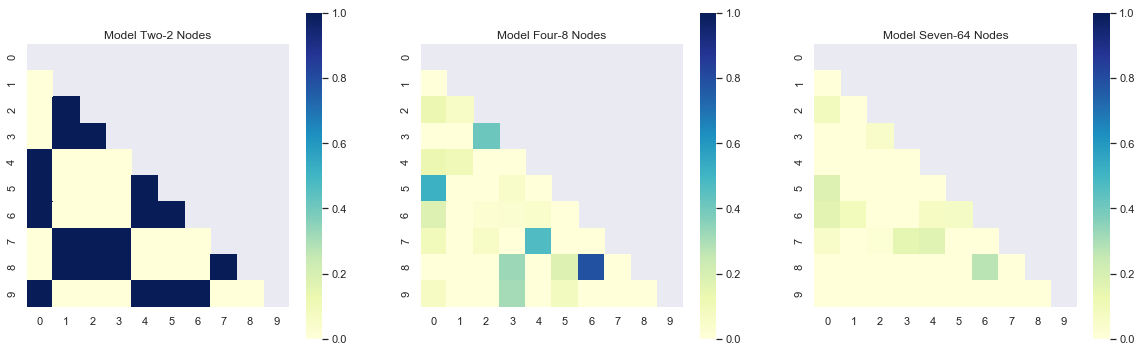

In [589]:
# heatmap of activations
fig = plt.figure(figsize=(20, 6))
plt.subplot(131)
corr_matrix(np.corrcoef(model2_hiddenoutput_T),"Model Two-2 Nodes")
plt.subplot(132)
corr_matrix(np.corrcoef(model4_hiddenoutput_T),"Model Four-8 Nodes")
plt.subplot(133)
corr_matrix(np.corrcoef(model7_hiddenoutput_T),"Model Seven-64 Nodes")

From the correlation matrices, the following can be observed:

* There are more clear patterns in models with fewer nodes than models with a larger number of nodes, which is contratry to expected results.
* In the two-node model, the digits 0,4,5,6,9 are strongly correlated with one another as is the digits 1,2,3,7,8. This observation suggests that the pixels within these images are different.
* In the eight-node model, the pattern becomes more distinct. Here, the digits 6 and 8 have the largest correlation, which may be one cause for misclassification. Furthermore, the digits 0 and 5 as well as 4 and 7 have a stronger correlation with one another. This result suggests that these numbers have a similar shape and are only distinguished by a few pixels. There are other trendss with other digits as well.
* Surprisingly, the 64-node model does not have any strong results. All the correlations are fairly weak, if not nonexistent. This result potentially confirms that with more complex models there is less ability to draw conclusions using the weights, giving support to the "black box" argument.

While this weight analysis is not comprehensive, it is revealing. Models with a fewer number of nodes have more greater correlation among weight values from the hidden-to-output layer than do models with a larger number of nodes. 

This result helps to illustrate that the weights are learning different patterns from the pixels and reponding to certain attributes in order to classify the digits appropriately. As a model increases the number of nodes, this information is more spread out. With a larger number of nodes, each node is capturing a different/unique piece of information, contributing to less correlation among the weights.

# Results
Before commentary can be provided on what was learned, a final step in the modeling process is to evaluate and select the final model. For brevity purposes, model one and model two will be removed from consideration, as they had the weakest overall performance (and happened to use the fewest number of nodes in the hidden layer).

Given that several models began overfitting after a certain number of epochs, the models are refit here using a smaller number of epochs and then evaluated on the test set. Below is a summary of how many epochs were used for each model:

* Fit 5 nodes with 100 epochs
* Fit 8 nodes with 50 epochs
* Fit 10 nodes with 30 epochs
* Fit 16 nodes with 30 epochs
* Fit 64 nodes with 20 epochs

Although evaluating and selecting the final model is not the primary focus of this assignment, this detail is provided to demonstrate a normal modeling process that should be followed for any real-world example. Once again, for brevity purposes, minimal commentary will be provided on the steps that were performed in this section.

The model with 64 nodes is selected as the final model as it has the highest overall accuracy on the test set, at 95.5%.

In [302]:
def model_evaluation(nodes, num_epochs):
    model = build_model(nodes) # builds the model that was defined above
    history = model.fit(X_train, y_train, batch_size=n_batch_size, epochs=num_epochs, validation_data = (X_val, y_val), verbose=0)
    results = model.evaluate(X_test, y_test)
    predictions = model.predict(X_test)
    return results, predictions, model

In [427]:
# generating loss and accuracy results
np.random.seed(37)
model_5nodes = model_evaluation(5, 100)
model_8nodes = model_evaluation(8, 50)
model_10nodes = model_evaluation(10, 30)
model_16nodes = model_evaluation(16, 30)
model_64nodes = model_evaluation(64, 20)

360/360 [==============================] - 0s 98us/step


In [428]:
# viewing overall loss and accuracy
print("5-node model ", model_5nodes[0])
print("8-node model ", model_8nodes[0])
print("10-node model ", model_10nodes[0])
print("16-node model ", model_16nodes[0])
print("64-node model ", model_64nodes[0])

5-node model  [0.4033339762025409, 0.8777777777777778]
8-node model  [0.38875254061486986, 0.8722222222222222]
10-node model  [0.47698636617925433, 0.8611111111111112]
16-node model  [0.22340283393859864, 0.9305555555555556]
64-node model  [0.1532789569762018, 0.9555555555555556]


In [593]:
# define the predictions
model_5nodes_predictions = model_5nodes[1]
model_8nodes_predictions = model_8nodes[1]
model_10nodes_predictions = model_10nodes[1]
model_16nodes_predictions = model_16nodes[1]
model_64nodes_predictions = model_64nodes[1]

In [594]:
# better understand the format of the predictions
# Each prediction is an array of 10 values
# The predictions sum to 1
# The largest value is the final prediction, which is a letter 5
print(model_64nodes_predictions[0])
print(model_64nodes_predictions[0].shape)
print(np.sum(model_64nodes_predictions[0]))
print(np.argmax(model_64nodes_predictions[0]))

[3.9987611e-03 5.9756912e-05 1.5794823e-05 2.5092992e-03 3.6429052e-04
 8.5985160e-01 3.2641386e-04 1.2962573e-04 6.2287352e-03 1.2651570e-01]
(10,)
1.0
5


In [ ]:
images_and_labels = list(zip(digits.images, digits.target))

for index, (image, label) in enumerate(images_and_labels[:10]):
    plt.subplot(2, 5, index + 1)
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Label: %i' % label)
    plt.axis('off')

In [320]:
# prepare the data for viewing
# grab some test images from the test data
test_images = X_test[:10]
print("Initial test image shape ", test_images[0].shape)

# reshape the test images to standard 8x8 format
test_images = test_images.reshape(test_images.shape[0], 8, 8)
print("Revised test image shape ", test_images[0].shape)

Initial test image shape  (64,)
Revised test image shape  (8, 8)


For a digit classification problem, a helpful exercise is to examine the output of the final model. 

Below is a sample of the first ten digits from the test set, along with their actual and predicted values.

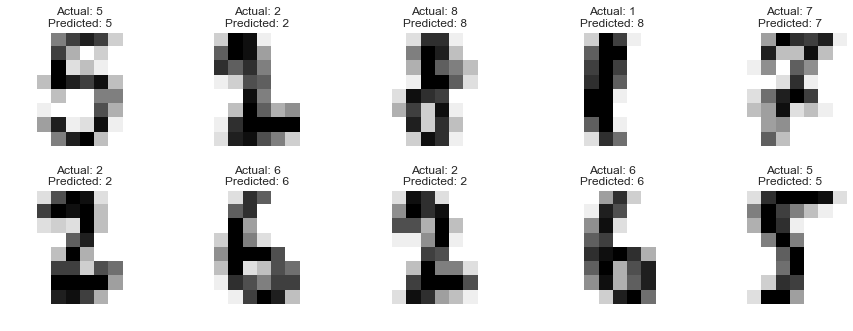

In [359]:
actual_labels = np.argmax(y_test[:10], axis=1)
fig = plt.figure(figsize=(15, 5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, test_image in enumerate(test_images):
    # grab a copy of test image for viewing
    org_image = test_image
    
    # data reshape
    test_image = test_image.reshape(1,64)

    # make prediction on test image using our best model
    prediction = model_64nodes[2].predict_classes(test_image, verbose=0)
    
    # display the prediction and image - similar to code above
    plt.subplot(2, 5, i + 1)
    plt.imshow(org_image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Actual: %i' %actual_labels[i] +str('\nPredicted: %i' %prediction[0]))
    plt.axis('off')

plt.show()

From these first ten digits, this model misclassifies one value, which is expected given the model's overall accuracy of 95.5%. More importantly, the misclassification occurs for a value that is supposed to be a one but is predicted to be an eight. Eight is also included in this sampling, and it is clear that the images of ones and eights are similar to one another, which is not expected.

As a final step, the misclassifications are examined to help discern future improvements for this model.

In [608]:
# need to get predictions in the right format b/c we are dealing with sublists, as we saw above
final_pred = []

for i in range(0, len(model_64nodes_predictions)):
    pred = np.argmax(model_64nodes_predictions[i])
    final_pred.append(pred)

In [626]:
# also easier if we are not working with one hot encoding labels
# let's change them back
y_test_orig = []

for i in range(0, len(y_test)):
    actual = np.argmax(y_test[i])
    y_test_orig.append(actual)

In [631]:
# combine into a dataframe for ease of use
prediction_df = pd.DataFrame(list(zip(y_test_orig, final_pred)), columns=['actual','predicted'])
prediction_df['misclassification'] = np.where(prediction_df['actual']!=prediction_df['predicted'], 1,0)
#print(prediction_df)

Text(0.5, 1.0, 'Digits by Misclassification')

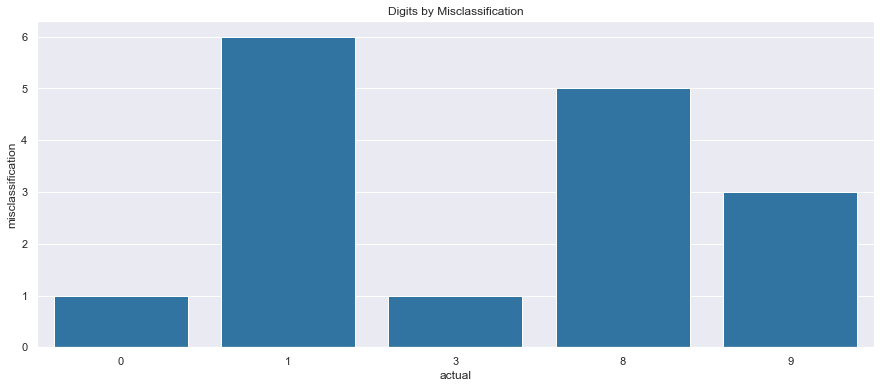

In [662]:
# show a plot of misclassifications
misclassification_sum = prediction_df[prediction_df['misclassification'] == 1].groupby('actual').agg({'misclassification':sum}).reset_index()
sns.set(style = "darkgrid")
sns.barplot(x='actual', y='misclassification',data=misclassification_sum, color=current_palette[0]).set_title("Digits by Misclassification") 


The plot above helps to show that ones and eights are the more common misclassified digits. Furthermore, the table below showcases which predictions are made for each misclassification. For instance, it can be observed that if an eight is misclassified, the majority of the time the prediction shows a one. This information could be used to help augment the training set with additional examples for certain classes.

In [670]:
# show a plot of misclassifications
misclassification_value = prediction_df[prediction_df['misclassification'] == 1].groupby(['actual','predicted']).count().reset_index()
misclassification_value

,actual,predicted,misclassification
0,0,4,1
1,1,5,1
2,1,8,2
3,1,9,3
4,3,2,1
5,8,1,4
6,8,7,1
7,9,4,1
8,9,7,1
9,9,8,1


In [591]:
# refit the model to full data set - this is needed if model will be applied to future data sets
# not executed but included as this is a step in the modeling process
#final_model = build_model(64)
#final_model.fit(X, y, batch_size=32, epochs=20, verbose=0)

In summary, this assignment developed seven convolutional neural network models using a single hidden layer, focusing on how the number of nodes within the hidden layer affected model performance. It was observed that model accuracy improved as the number of nodes increased. However, overfitting was a problem that had to be addressed by reducing the number of epochs.

More importantly, some initial analysis was performed on the relationship between the weights of each digit within the hidden-to-output layer. The results suggest that as the number of nodes increase, there is less correlation between the weight values for each digit. In short, it appears that the weights share more information when there are less nodes, supporting Chollet's statement that the weights are the network's knowledge (p. 58).

# Conclusions
Given the results observed above, this exercise has proved to be informative for future digit classification models.

First, building a model for handwritten digits can be challenging because of the variability in the data. More time should be spent up front inspecting each image and understanding the range of values. For instance, plotting the average pixel depth for each pixel for each digit could help point out standard data patterns and thus help hone in on atypical images that should be analyzed further.

While an MLP model, a neural network with a single hidden layer, achieved a fairly strong performance, it would be worthwhile to consider a deeper architecture with more hidden layers. By stacking multiple layers together, the network will be able to learn different patterns from the data and thus achieve a higher accuracy. Statistical power is very important for this type of problem.

Additionally, k-fold cross validation should be used to build any digit classification model, as this step is most helpful in selecting and validating the appropriate hyperparameters. Because the focus of this assignment was just on the nodes, k-fold cross validation was omitted. However, considering other values for hyperparameters is needed to ensure that the optimal model is chosen. As part of this process, a strategy for addressing overfitting will be needed. Building in appropriate time for model training is key and should be communicated appropriately to stakeholders.

Furthermore, it would be a worthwhile exercise to render images from the model themselves. That way, predicted and actual images for each digit class could be compared to one another. This exercise, along with some of the graphical output shown above, can help to reveal where a model might not be performing as well. Data augmentation may be a helpful next step in improving model accuracy, as this process introduces more relevant data for training. Another avenue may be to consider a more specialized model that helps to focus on smaller areas of an image that are used to separate digit classes (that are more similar to one another).

All in all, it is clear that a digit classification exercise requires thoughtful inspection of the data and the model results, since the goal is to develop a highly accurate model. 

# Sources

Chollet, F. (2018). Deep Learning with Python. Shelter Island: Manning.
How to Visualize a Deep Learning Neural Network Model in Keras. (2017, September 26). Retrieved from https://machinelearningmastery.com/visualize-deep-learning-neural-network-model-keras/
Ujjwalkarn. (2016, August 10). A Quick Introduction to Neural Networks. Retrieved from https://ujjwalkarn.me/2016/08/09/quick-intro-neural-networks/

# Appendix

In [ ]:
# k-fold cross validation - chollet textbook
k = 4
num_validation_samples = len(X_train) // k

np.random.shuffle(X_train) # best practice before doing the splits; otherwise, might only get certain classes in splits

#validation_scores = []
all_loss_history = []
all_val_loss_history = []
all_accuracy_history = []
all_val_accuracy_history = []

for fold in range(k):
    print('processing fold #', fold)
    validation_data = X_train[num_validation_samples * fold: num_validation_samples * (fold + 1)]
    validation_targets = y_train[fold * num_validation_samples: num_validation_samples * (fold + 1)]
    
    # uses the remainder of the data as training data
    # originally used + to concatenate but was getting an error so switched to np.concatenate()
    partial_train_data = np.concatenate([X_train[:num_validation_samples * fold], X_train[num_validation_samples * (fold + 1):]],axis=0) 
    partial_train_targets = np.concatenate([y_train[:num_validation_samples * fold], y_train[num_validation_samples * (fold + 1):]],axis=0)
    
    model = build_model(32) # builds the model that was defined above
    history = model.fit(partial_train_data, partial_train_targets, epochs = num_epochs, batch_size = , verbose = 0, validation_data = (validation_data, validation_targets))
    
    # grab our loss and accuracy values
    loss_history = history.history['loss']
    all_loss_history.append(loss_history)
    
    val_loss_history = history.history['val_loss']
    all_val_loss_history.append(val_loss_history)
    
    accuracy_history = history.history['acc']
    all_accuracy_history.append(accuracy_history)
    
    val_accuracy_history = history.history['val_acc']
    all_val_accuracy_history.append(val_accuracy_history)

In [55]:
# getting the average values across each fold
average_accuracy_history = [np.mean([x[i] for x in all_accuracy_history]) for i in range(num_epochs)]
average_val_accuracy_history = [np.mean([x[i] for x in all_val_accuracy_history]) for i in range(num_epochs)]